<a href="https://colab.research.google.com/github/sa2202/AspireNex/blob/main/IRIS_PREDCITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, SimpleRNN, LSTM, Bidirectional
from keras.utils import to_categorical

In [3]:
file_path = '/content/IRIS.csv'
data = pd.read_csv(file_path)

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [36]:
data.shape

(150, 5)

In [37]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
X = data.drop('species', axis=1)
y = data['species']

In [41]:
data["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [55]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [56]:
X.shape

(150, 4)

In [57]:
y.shape

(150,)

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,  y_categorical, test_size=0.3, random_state=42)


In [66]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    if model_name in ["CNN", "MLP", "RNN", "LSTM", "BiLSTM"]:
        y_pred_labels = encoder.inverse_transform(y_pred.argmax(axis=1))
        y_test_labels = encoder.inverse_transform(y_test.argmax(axis=1))
    else:
        y_pred_labels = encoder.inverse_transform(y_pred)
        y_test_labels = encoder.inverse_transform(y_test.argmax(axis=1))
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test_labels, y_pred_labels))
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    return accuracy, f1

In [67]:
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(3, activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=50, batch_size=10, validation_data=(X_test.reshape(-1, X_test.shape[1], 1), y_test))

Epoch 1/50
11/11 [==============================] - 1s 25ms/step - loss: 1.0622 - accuracy: 0.4667 - val_loss: 0.9307 - val_accuracy: 0.6222
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 0.9557 - accuracy: 0.4571 - val_loss: 0.8329 - val_accuracy: 0.5333
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.8677 - accuracy: 0.5048 - val_loss: 0.7500 - val_accuracy: 0.7333
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.7890 - accuracy: 0.7048 - val_loss: 0.6824 - val_accuracy: 0.7778
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.7210 - accuracy: 0.7810 - val_loss: 0.6270 - val_accuracy: 0.7778
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6652 - accuracy: 0.7905 - val_loss: 0.5797 - val_accuracy: 0.8000
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.6160 - accuracy: 0.8000 - val_loss: 0.5410 - val_accuracy: 0.8222
Epoch 8/50
11/11 [=

2/2 [==============================] - 0s 7ms/step
CNN Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



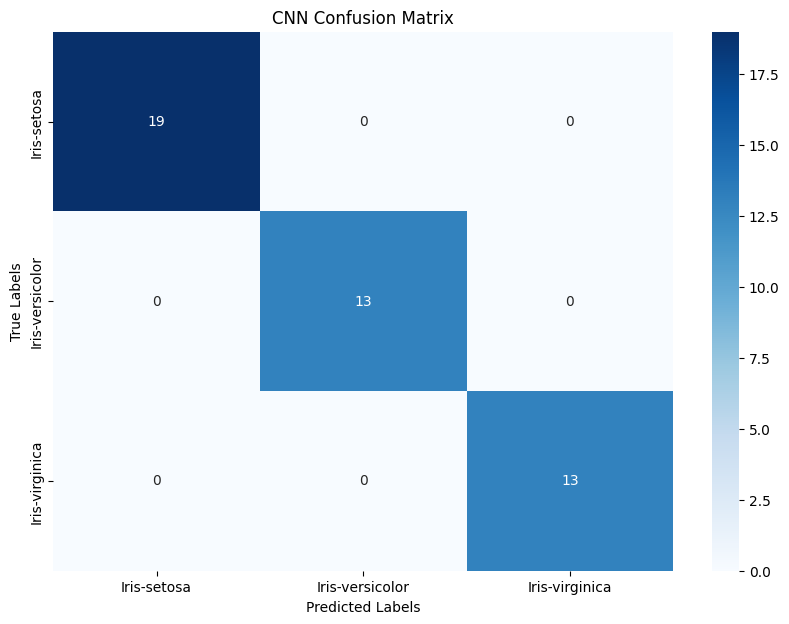

In [68]:
cnn_accuracy, cnn_f1 = evaluate_model(cnn_model, X_test.reshape(-1, X_test.shape[1], 1), y_test, "CNN")


In [69]:
mlp_model = Sequential()
mlp_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(3, activation='softmax'))

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/50
11/11 [==============================] - 1s 29ms/step - loss: 0.9416 - accuracy: 0.7143 - val_loss: 0.8459 - val_accuracy: 0.8222
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.7582 - accuracy: 0.8286 - val_loss: 0.6715 - val_accuracy: 0.8222
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6122 - accuracy: 0.8381 - val_loss: 0.5335 - val_accuracy: 0.8222
Epoch 4/50
11/11 [==============================] - 0s 10ms/step - loss: 0.5046 - accuracy: 0.8381 - val_loss: 0.4419 - val_accuracy: 0.8222
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4274 - accuracy: 0.8381 - val_loss: 0.3835 - val_accuracy: 0.8444
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.3773 - accuracy: 0.8381 - val_loss: 0.3453 - val_accuracy: 0.8444
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 0.3418 - accuracy: 0.8476 - val_loss: 0.3196 - val_accuracy: 0.8444
Epoch 8/50
11/11 [

2/2 [==============================] - 0s 16ms/step
MLP Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



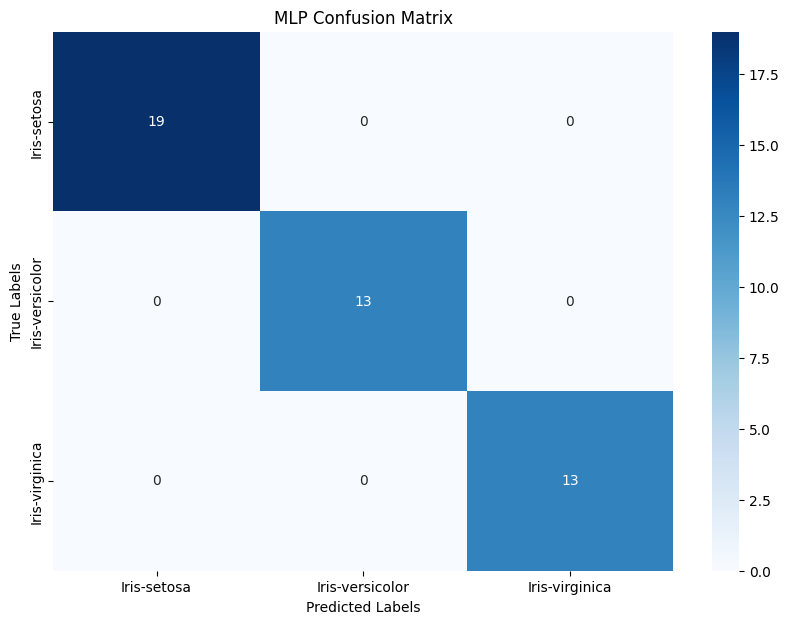

In [70]:
mlp_accuracy, mlp_f1 = evaluate_model(mlp_model, X_test, y_test, "MLP")

Epoch 1/50
11/11 [==============================] - 4s 64ms/step - loss: 1.0965 - accuracy: 0.4000 - val_loss: 1.0000 - val_accuracy: 0.7111
Epoch 2/50
11/11 [==============================] - 0s 11ms/step - loss: 0.9836 - accuracy: 0.6095 - val_loss: 0.8744 - val_accuracy: 0.7111
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 0.8795 - accuracy: 0.6571 - val_loss: 0.7571 - val_accuracy: 0.7333
Epoch 4/50
11/11 [==============================] - 0s 15ms/step - loss: 0.7732 - accuracy: 0.7905 - val_loss: 0.6504 - val_accuracy: 0.7778
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6723 - accuracy: 0.8571 - val_loss: 0.5573 - val_accuracy: 0.8667
Epoch 6/50
11/11 [==============================] - 0s 13ms/step - loss: 0.5823 - accuracy: 0.8476 - val_loss: 0.4716 - val_accuracy: 0.8444
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 0.5063 - accuracy: 0.8667 - val_loss: 0.4090 - val_accuracy: 0.8667
Epoch 8/50
11

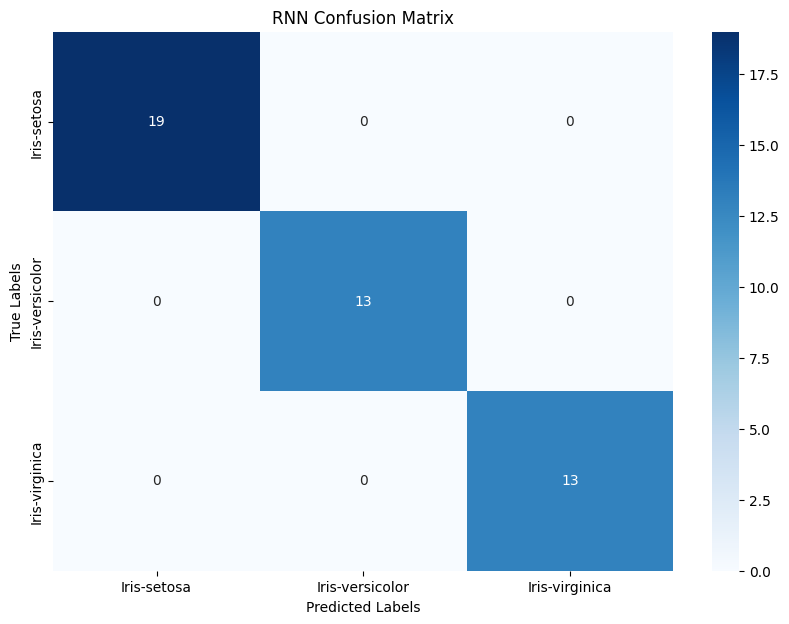

In [14]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(3, activation='softmax'))

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=50, batch_size=10, validation_data=(X_test.reshape(-1, X_test.shape[1], 1), y_test))

# Evaluate RNN Model
rnn_accuracy, rnn_f1 = evaluate_model(rnn_model, X_test.reshape(-1, X_test.shape[1], 1), y_test, "RNN")

# Train LSTM Model

Epoch 1/50
11/11 [==============================] - 5s 120ms/step - loss: 1.0914 - accuracy: 0.3333 - val_loss: 1.0649 - val_accuracy: 0.6889
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 1.0543 - accuracy: 0.6476 - val_loss: 1.0254 - val_accuracy: 0.7111
Epoch 3/50
11/11 [==============================] - 0s 25ms/step - loss: 1.0219 - accuracy: 0.6381 - val_loss: 0.9867 - val_accuracy: 0.7111
Epoch 4/50
11/11 [==============================] - 0s 20ms/step - loss: 0.9881 - accuracy: 0.6381 - val_loss: 0.9451 - val_accuracy: 0.7111
Epoch 5/50
11/11 [==============================] - 0s 25ms/step - loss: 0.9518 - accuracy: 0.6286 - val_loss: 0.8994 - val_accuracy: 0.7111
Epoch 6/50
11/11 [==============================] - 0s 24ms/step - loss: 0.9119 - accuracy: 0.6286 - val_loss: 0.8501 - val_accuracy: 0.7111
Epoch 7/50
11/11 [==============================] - 0s 24ms/step - loss: 0.8662 - accuracy: 0.6286 - val_loss: 0.7944 - val_accuracy: 0.7111
Epoch 8/50
1

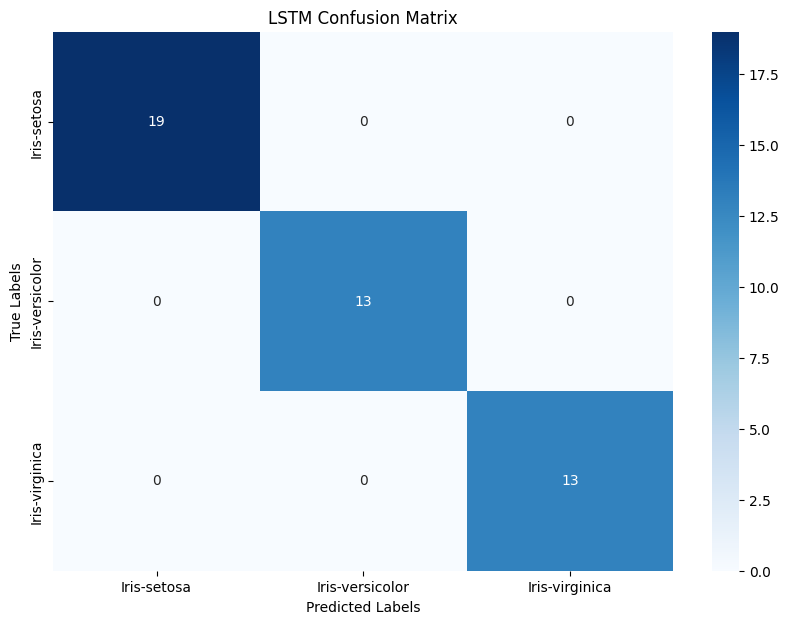

In [15]:
lstm_model = Sequential()
lstm_model.add(LSTM(32, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(3, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=50, batch_size=10, validation_data=(X_test.reshape(-1, X_test.shape[1], 1), y_test))

# Evaluate LSTM Model
lstm_accuracy, lstm_f1 = evaluate_model(lstm_model, X_test.reshape(-1, X_test.shape[1], 1), y_test, "LSTM")

Epoch 1/50
11/11 [==============================] - 5s 86ms/step - loss: 1.0449 - accuracy: 0.6190 - val_loss: 1.0157 - val_accuracy: 0.7111
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 1.0080 - accuracy: 0.6286 - val_loss: 0.9731 - val_accuracy: 0.7111
Epoch 3/50
11/11 [==============================] - 0s 11ms/step - loss: 0.9654 - accuracy: 0.6286 - val_loss: 0.9270 - val_accuracy: 0.7111
Epoch 4/50
11/11 [==============================] - 0s 12ms/step - loss: 0.9193 - accuracy: 0.6286 - val_loss: 0.8727 - val_accuracy: 0.7111
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 0.8649 - accuracy: 0.6286 - val_loss: 0.8087 - val_accuracy: 0.7111
Epoch 6/50
11/11 [==============================] - 0s 14ms/step - loss: 0.7999 - accuracy: 0.6381 - val_loss: 0.7421 - val_accuracy: 0.7111
Epoch 7/50
11/11 [==============================] - 0s 19ms/step - loss: 0.7335 - accuracy: 0.6476 - val_loss: 0.6613 - val_accuracy: 0.7111
Epoch 8/50
11

2/2 [==============================] - 0s 9ms/step
BiLSTM Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



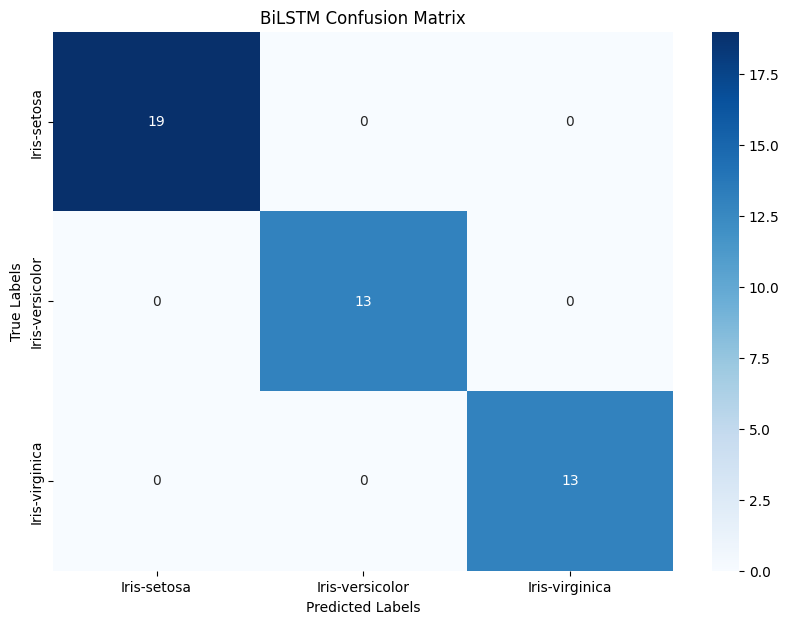

In [16]:
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(32, activation='relu'), input_shape=(X_train.shape[1], 1)))
bilstm_model.add(Dense(3, activation='softmax'))

bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bilstm_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=50, batch_size=10, validation_data=(X_test.reshape(-1, X_test.shape[1], 1), y_test))

# Evaluate BiLSTM Model
bilstm_accuracy, bilstm_f1 = evaluate_model(bilstm_model, X_test.reshape(-1, X_test.shape[1], 1), y_test, "BiLSTM")


In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105, 3)
(45, 3)


In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["species"] = label_encoder.fit_transform(data['species'])

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = None)
classifier.fit(X_train, y_train)

LogisticRegression()

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix is : ")
print(cm)
acc_lr=accuracy_score(y_test, y_pred)
print(acc_lr)

f1_lr=f1_score(y_test, y_pred, average='weighted')
print(f1_lr)

The Confusion Matrix is : 
[[16  0  0]
 [ 0 17  1]
 [ 0  2  9]]
0.9333333333333333
0.9326469326469327


In [97]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix is : ")
print(cm)
acc_knn=accuracy_score(y_test, y_pred)
print(acc_knn)

f1_knn=f1_score(y_test, y_pred, average='weighted')
print(f1_knn)

The Confusion Matrix is : 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
0.9777777777777777
0.9779434092477569


In [99]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix is : ")
print(cm)
acc_nb=accuracy_score(y_test, y_pred)
print(acc_nb)

f1_nb=f1_score(y_test, y_pred, average='weighted')
print(f1_nb)

The Confusion Matrix is : 
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
1.0
1.0


In [101]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix is : ")
print(cm)
acc_rf=accuracy_score(y_test, y_pred)
print(acc_rf)

f1_rf=f1_score(y_test, y_pred, average='weighted')
print(f1_rf)

The Confusion Matrix is : 
[[16  0  0]
 [ 0 17  1]
 [ 0  2  9]]
0.9333333333333333
0.9326469326469327


In [106]:
results = {
    "Model": ["CNN", "MLP", "RNN", "LSTM", "BiLSTM", "Random Forest", "Logistic Regression", "k-NN", "Gaussian"],
    "Accuracy": [cnn_accuracy, mlp_accuracy, rnn_accuracy, lstm_accuracy, bilstm_accuracy, acc_rf, acc_lr, acc_knn, acc_nb],
    "F1 Score": [cnn_f1, mlp_f1, rnn_f1, lstm_f1, bilstm_f1, f1_rf, f1_lr,f1_knn,f1_nb]
}
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=True)
print(results_df)

                 Model  Accuracy  F1 Score
5        Random Forest  0.933333  0.932647
6  Logistic Regression  0.933333  0.932647
7                 k-NN  0.977778  0.977943
0                  CNN  1.000000  1.000000
1                  MLP  1.000000  1.000000
2                  RNN  1.000000  1.000000
3                 LSTM  1.000000  1.000000
4               BiLSTM  1.000000  1.000000
8             Gaussian  1.000000  1.000000
